<a href="https://colab.research.google.com/github/Mikes017/proyectofinalSiafi/blob/main/proyectofinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129314 (\N{NAUSEATED FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


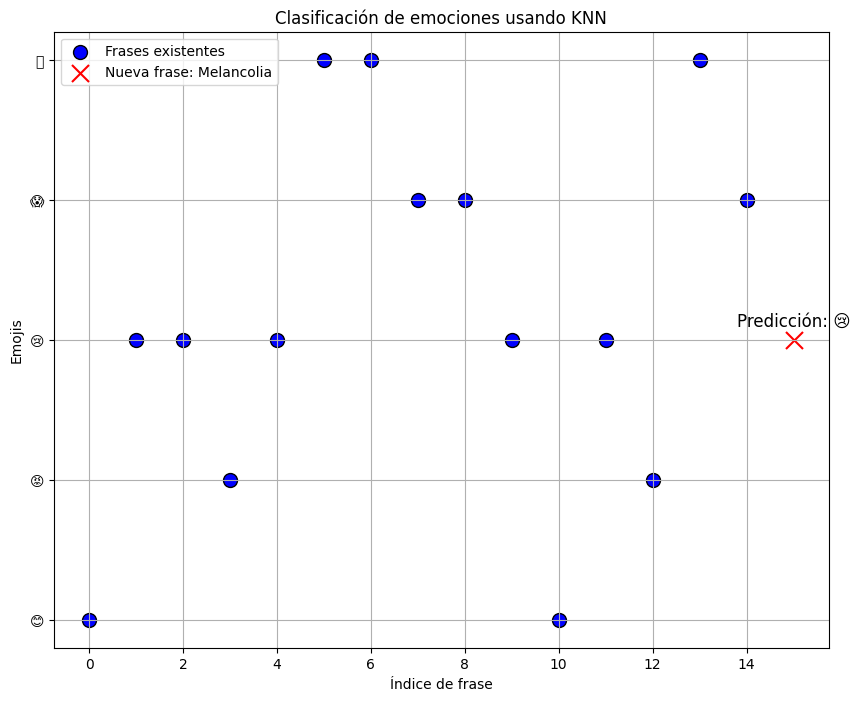

La frase 'Melancolia' tiene una emoción clasificada como 😢.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier


datos = [
    ("Melancolia", "😊"),  # Alegría
    ("Melancolia", "😢"),  # Tristeza
    ("Melancolia", "😢"),  # Tristeza

    ("Traicion", "😡"), # Furia
    ("Traicion", "😢"), # Tristeza

    ("LaSustancia", "🤢"),# Desagrado
    ("LaSustancia", "🤢"),# Desagrado
    ("LaSustancia", "😱"), # Temor

    ("NumeroDeInscripcion", "😱"), # Temor
    ("NumeroDeInscripcion", "😢"), # Temor


    ("Alegria", "😊"),        # Alegría
    ("Tristeza", "😢"),     # Tristeza
    ("Furia", "😡"),      # Furia
    ("Desagrado", "🤢"),          # Desagrado
    ("Temor", "😱"), # Temor

]


frases = [d[0] for d in datos]  # Frases
emojis = [d[1] for d in datos]  # Emojis (etiquetas)

# vectores TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(frases).toarray()

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, emojis)

# Nueva frase para clasifica
nueva_frase = "Melancolia"
nueva_vector = vectorizer.transform([nueva_frase]).toarray()

# Clasificación
prediccion = knn.predict(nueva_vector)

# Asignar índices a los emojis para representación en el eje Y
emoji_indices = {emoji: idx for idx, emoji in enumerate(sorted(set(emojis)))}
y_indices = [emoji_indices[emoji] for emoji in emojis]
prediccion_idx = emoji_indices[prediccion[0]]

# Visualización de datos
plt.figure(figsize=(10, 8))
plt.scatter(range(len(emojis)), y_indices, c='blue', s=100, edgecolors='k', label='Frases existentes')
plt.scatter(len(emojis), prediccion_idx, c='red', marker='x', s=150, label=f'Nueva frase: {nueva_frase}')
plt.title('Clasificación de emociones usando KNN')
plt.xlabel('Índice de frase')
plt.ylabel('Emojis')
plt.yticks(list(emoji_indices.values()), list(emoji_indices.keys()))
plt.legend()
plt.grid()
plt.annotate(f'Predicción: {prediccion[0]}', xy=(len(emojis), prediccion_idx),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)
plt.show()

print(f"La frase '{nueva_frase}' tiene una emoción clasificada como {prediccion[0]}.")
